Importing libraries


In [1]:
#importing all required python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Loading

In [2]:
# Loading the dataset into the variable data
file_path = 'DSCI 5240 Project Data.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,Water Pump ID,Water Source Type,Water Quality,Distance to Nearest Town,Population Served,Installation Year,Funder,Payment Type,Water Pump Age,Pump Type,GPS Coordinates,Functioning Status
0,WP001,['Lake'],['Contaminated'],[41],[11000],NaN,['World Bank'],['Free'],16.0,['Motorized Pump'],"(-17.942320739100097, 19.590746630360105)",Functioning
1,WP002,['Well'],['Contaminated'],[13],[8000],2009.0,['Red Cross'],['Free'],15.0,['Hand Pump'],"(-20.261819627668434, 21.92318375357211)",Not Functioning
2,WP003,['River'],['Clean'],[33],NaN,2005.0,['World Bank'],['Free'],19.0,NaN,"(-23.643947890751747, 22.996280842486023)",Not Functioning
3,WP004,['Well'],['Clean'],[53],[12000],1995.0,['USAID'],['Free'],29.0,['Hand Pump'],NaN,Functioning
4,WP005,['Well'],['Contaminated'],[38],[15000],2007.0,['World Bank'],['Free'],17.0,['Hand Pump'],"(-18.116801433155366, 20.136925350142157)",Not Functioning


Description of the dataset

In [3]:
#Displaying dataset information
print("Data Info:")
print(data.info())

#Printing the description of the dataset
print("\nData Description:")
print(data.describe())

#For categorical data, we can use:
print(data.describe(include=['O']))  #'O' denotes objects, typically strings for pandas

#Printing the missing value count of each column
print("\nMissing Values:")
print(data.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Water Pump ID             4750 non-null   object 
 1   Water Source Type         4750 non-null   object 
 2   Water Quality             4750 non-null   object 
 3   Distance to Nearest Town  4750 non-null   object 
 4   Population Served         4278 non-null   object 
 5   Installation Year         4750 non-null   float64
 6   Funder                    4750 non-null   object 
 7   Payment Type              4750 non-null   object 
 8   Water Pump Age            4750 non-null   float64
 9   Pump Type                 4750 non-null   object 
 10  GPS Coordinates           4750 non-null   object 
 11  Functioning Status        4750 non-null   object 
dtypes: float64(2), object(10)
memory usage: 468.9+ KB
None

Data Description:
       Installation Year  Water P

# **Exploratory data analysis (EDA)**

### **Data Cleaning**

Handling missing values of categorical columns using mode

In [4]:
# Calculating mode values for categorical columns to fill the missing values
mode_values = data[['Water Source Type', 'Water Quality', 'Payment Type', 'Functioning Status', 'Funder', 'Pump Type']].mode().iloc[0]

# Fill in missing values using the mode
data['Water Source Type'].fillna(mode_values['Water Source Type'], inplace=True)
data['Water Quality'].fillna(mode_values['Water Quality'], inplace=True)
data['Payment Type'].fillna(mode_values['Payment Type'], inplace=True)
data['Functioning Status'].fillna(mode_values['Functioning Status'], inplace=True)
data['Funder'].fillna(mode_values['Funder'], inplace=True)
data['Pump Type'].fillna(mode_values['Pump Type'], inplace=True)
print(data.head())

# Confirm that all missing values are handled
print(data.isnull().sum())

  Water Pump ID Water Source Type     Water Quality Distance to Nearest Town  \
0         WP001          ['Lake']  ['Contaminated']                     [41]   
1         WP002          ['Well']  ['Contaminated']                     [13]   
2         WP003         ['River']         ['Clean']                     [33]   
3         WP004          ['Well']         ['Clean']                     [53]   
4         WP005          ['Well']  ['Contaminated']                     [38]   

  Population Served  Installation Year          Funder Payment Type  \
0           [11000]                NaN  ['World Bank']     ['Free']   
1            [8000]             2009.0   ['Red Cross']     ['Free']   
2               NaN             2005.0  ['World Bank']     ['Free']   
3           [12000]             1995.0       ['USAID']     ['Free']   
4           [15000]             2007.0  ['World Bank']     ['Free']   

   Water Pump Age           Pump Type  \
0            16.0  ['Motorized Pump']   
1         

Handling missing values of Numerical columns using median

In [5]:
from datetime import datetime
# Calculating the current year
current_year = datetime.now().year

# Calculating mode for both installation year and water pump age
median_installation_year = data['Installation Year'].median()
median_water_pump_age = data['Water Pump Age'].median()

# Replacing the missing values based on current year
def estimate_values(row):
    if pd.isna(row['Installation Year']) and not pd.isna(row['Water Pump Age']):
        return current_year - row['Water Pump Age'], row['Water Pump Age']
    elif not pd.isna(row['Installation Year']) and pd.isna(row['Water Pump Age']):
        return row['Installation Year'], current_year - row['Installation Year']
    else:
        # Handling the rows where both values are missing
        return (row['Installation Year'] if not pd.isna(row['Installation Year']) else median_installation_year,
                row['Water Pump Age'] if not pd.isna(row['Water Pump Age']) else median_water_pump_age)

# Apply the function to update both columns simultaneously
data[['Installation Year', 'Water Pump Age']] = data.apply(lambda row: estimate_values(row), axis=1, result_type='expand')

# Function to convert string list representations into integers
def clean_numeric(x):
    if pd.isna(x):
        return x
    # Remove brackets and convert to integer
    return int(x.strip('[]'))

# Handling missing data of 'Population Served' and 'Distance to Nearest Town' using median as they are numeric values
data['Population Served'] = data['Population Served'].apply(clean_numeric)
data['Distance to Nearest Town'] = data['Distance to Nearest Town'].apply(clean_numeric)

# Calculate median values after cleaning
median_population_served = data['Population Served'].median()
median_distance_to_nearest_town = data['Distance to Nearest Town'].median()

# Fill missing values using the median
data['Population Served'].fillna(median_population_served, inplace=True)
data['Distance to Nearest Town'].fillna(median_distance_to_nearest_town, inplace=True)

#Print the first few rows of the dataset
print(data.head())

# Confirm that all missing values are handled
print(data.isnull().sum())

  Water Pump ID Water Source Type     Water Quality  Distance to Nearest Town  \
0         WP001          ['Lake']  ['Contaminated']                      41.0   
1         WP002          ['Well']  ['Contaminated']                      13.0   
2         WP003         ['River']         ['Clean']                      33.0   
3         WP004          ['Well']         ['Clean']                      53.0   
4         WP005          ['Well']  ['Contaminated']                      38.0   

   Population Served  Installation Year          Funder Payment Type  \
0            11000.0             2008.0  ['World Bank']     ['Free']   
1             8000.0             2009.0   ['Red Cross']     ['Free']   
2            13000.0             2005.0  ['World Bank']     ['Free']   
3            12000.0             1995.0       ['USAID']     ['Free']   
4            15000.0             2007.0  ['World Bank']     ['Free']   

   Water Pump Age           Pump Type  \
0            16.0  ['Motorized Pump']  

Handling missing values of water pump ID

In [6]:
# Check the highest number used in the existing IDs
max_id = data['Water Pump ID'].dropna().apply(lambda x: int(x.replace('WP', ''))).max()

# Function to generate new IDs
def generate_id(start):
    # Starting from the max existing ID + 1
    while True:
        start += 1
        yield f'WP{start:03d}'

# Create a generator
new_id_gen = generate_id(max_id)

# Fill missing IDs
data['Water Pump ID'] = data['Water Pump ID'].apply(lambda x: next(new_id_gen) if pd.isna(x) else x)

#Print the first few rows of the dataset
print(data.head())

# Confirm that all missing values are handled
print(data.isnull().sum())


  Water Pump ID Water Source Type     Water Quality  Distance to Nearest Town  \
0         WP001          ['Lake']  ['Contaminated']                      41.0   
1         WP002          ['Well']  ['Contaminated']                      13.0   
2         WP003         ['River']         ['Clean']                      33.0   
3         WP004          ['Well']         ['Clean']                      53.0   
4         WP005          ['Well']  ['Contaminated']                      38.0   

   Population Served  Installation Year          Funder Payment Type  \
0            11000.0             2008.0  ['World Bank']     ['Free']   
1             8000.0             2009.0   ['Red Cross']     ['Free']   
2            13000.0             2005.0  ['World Bank']     ['Free']   
3            12000.0             1995.0       ['USAID']     ['Free']   
4            15000.0             2007.0  ['World Bank']     ['Free']   

   Water Pump Age           Pump Type  \
0            16.0  ['Motorized Pump']  

Dropping missing values of GPS Coordinates

In [7]:
#Dropping the missing values of GPS Coordinates
data.dropna(subset=['GPS Coordinates'], inplace=True)
#Print the first few rows of the dataset
print(data.head())

# Confirm that all missing values are handled
print(data.isnull().sum())

  Water Pump ID Water Source Type     Water Quality  Distance to Nearest Town  \
0         WP001          ['Lake']  ['Contaminated']                      41.0   
1         WP002          ['Well']  ['Contaminated']                      13.0   
2         WP003         ['River']         ['Clean']                      33.0   
4         WP005          ['Well']  ['Contaminated']                      38.0   
5         WP006         ['River']  ['Contaminated']                      53.0   

   Population Served  Installation Year          Funder     Payment Type  \
0            11000.0             2008.0  ['World Bank']         ['Free']   
1             8000.0             2009.0   ['Red Cross']         ['Free']   
2            13000.0             2005.0  ['World Bank']         ['Free']   
4            15000.0             2007.0  ['World Bank']         ['Free']   
5            13000.0             2005.0       ['USAID']  ['Pay per use']   

   Water Pump Age           Pump Type  \
0            16

Handling outliers using IQR method

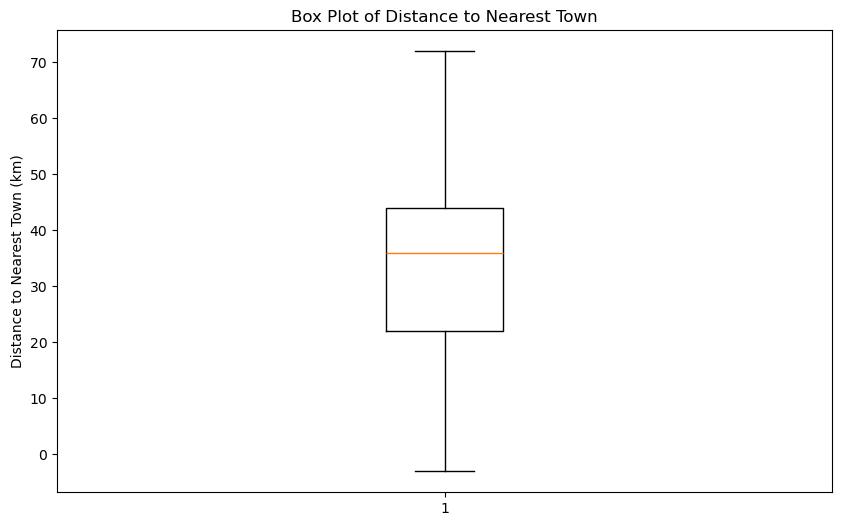

Outliers in Distance to Nearest Town:
Empty DataFrame
Columns: [Water Pump ID, Water Source Type, Water Quality, Distance to Nearest Town, Population Served, Installation Year, Funder, Payment Type, Water Pump Age, Pump Type, GPS Coordinates, Functioning Status]
Index: []


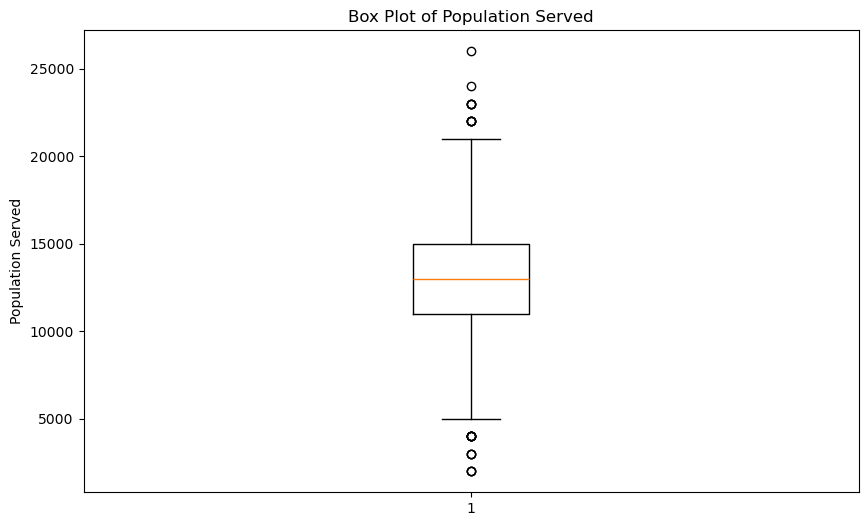

Outliers in Population Served:
     Water Pump ID Water Source Type     Water Quality  \
571          WP572          ['Well']  ['Contaminated']   
597          WP598          ['Well']         ['Clean']   
743          WP744          ['Well']         ['Clean']   
792          WP793         ['River']         ['Clean']   
934          WP935         ['River']  ['Contaminated']   
1020        WP1021         ['River']  ['Contaminated']   
1119        WP1120          ['Well']         ['Clean']   
1536        WP1537      ['Borehole']         ['Clean']   
1754        WP1755      ['Borehole']         ['Clean']   
1922        WP1923         ['River']         ['Clean']   
2083        WP2084         ['River']         ['Clean']   
2375        WP2376          ['Well']  ['Contaminated']   
2452        WP2453      ['Borehole']         ['Clean']   
3024        WP3025         ['River']         ['Clean']   
3376        WP3377         ['River']         ['Clean']   
4135        WP4136          ['Well']     

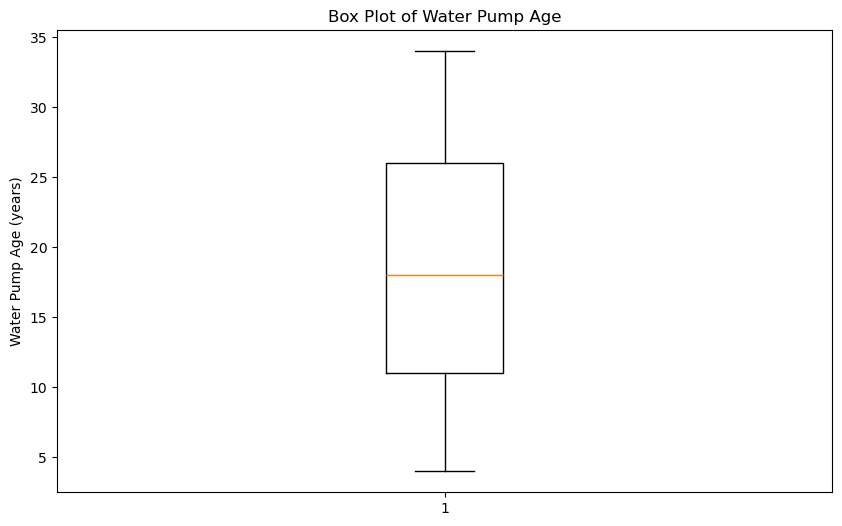

Outliers in Water Pump Age:
Empty DataFrame
Columns: [Water Pump ID, Water Source Type, Water Quality, Distance to Nearest Town, Population Served, Installation Year, Funder, Payment Type, Water Pump Age, Pump Type, GPS Coordinates, Functioning Status]
Index: []
       Distance to Nearest Town  Population Served  Installation Year  \
count               4726.000000        4726.000000        4726.000000   
mean                  33.699323       13002.750741        2005.259204   
std                   13.791016        2715.854460           8.813932   
min                   -3.000000        5000.000000        1990.000000   
25%                   22.000000       11000.000000        1998.000000   
50%                   36.000000       13000.000000        2005.500000   
75%                   44.000000       15000.000000        2013.000000   
max                   72.000000       21000.000000        2020.000000   

       Water Pump Age  
count     4726.000000  
mean        18.740796  
std    

In [8]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Box plot for Distance to Nearest Town with outliers highlighted
plt.figure(figsize=(10, 6))
plt.boxplot(data['Distance to Nearest Town'].dropna())
plt.title('Box Plot of Distance to Nearest Town')
plt.ylabel('Distance to Nearest Town (km)')
plt.show()

# Identify and handle outliers for Distance to Nearest Town
outliers_distance = identify_outliers(data, 'Distance to Nearest Town')
print("Outliers in Distance to Nearest Town:")
print(outliers_distance)

# Box plot for Population Served with outliers highlighted
plt.figure(figsize=(10, 6))
plt.boxplot(data['Population Served'].dropna())
plt.title('Box Plot of Population Served')
plt.ylabel('Population Served')
plt.show()

# Identify and handle outliers for Population Served
outliers_population = identify_outliers(data, 'Population Served')
print("Outliers in Population Served:")
print(outliers_population)

# Box plot for Water Pump Age with outliers highlighted
plt.figure(figsize=(10, 6))
plt.boxplot(data['Water Pump Age'].dropna())
plt.title('Box Plot of Water Pump Age')
plt.ylabel('Water Pump Age (years)')
plt.show()

# Identify and handle outliers for Water Pump Age
outliers_age = identify_outliers(data, 'Water Pump Age')
print("Outliers in Water Pump Age:")
print(outliers_age)

# Remove outliers and override the original dataset
data = data[~data.index.isin(outliers_distance.index)]
data = data[~data.index.isin(outliers_population.index)]
data = data[~data.index.isin(outliers_age.index)]

# Summary statistics after outlier removal
summary_statistics_cleaned = data.describe()
print(summary_statistics_cleaned)

Plotting the graphs for Categorical columns

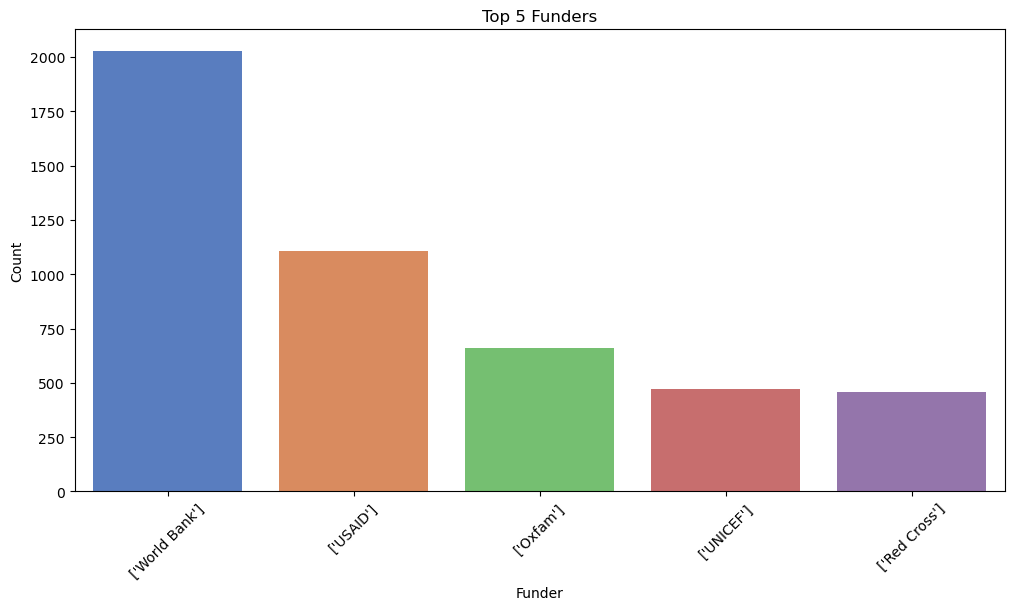

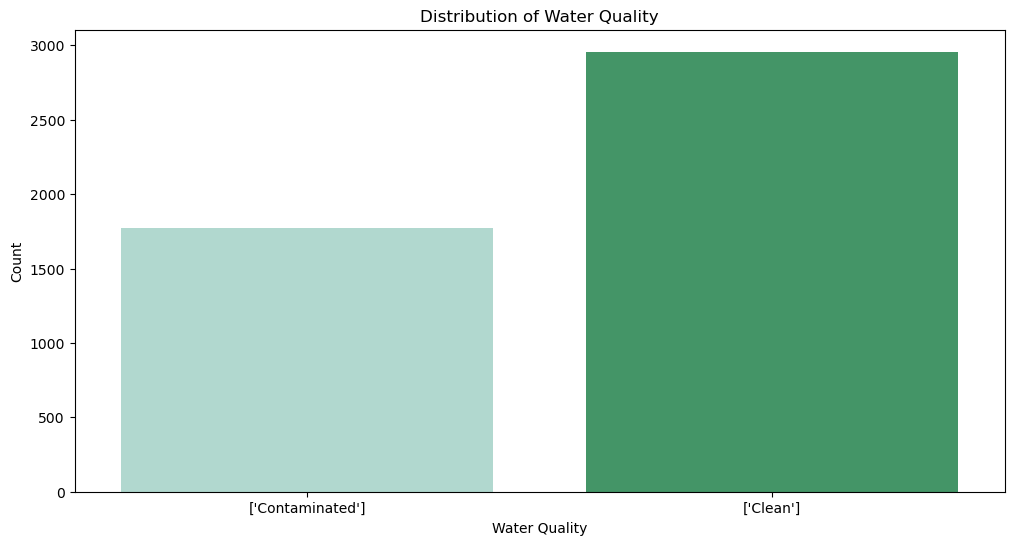

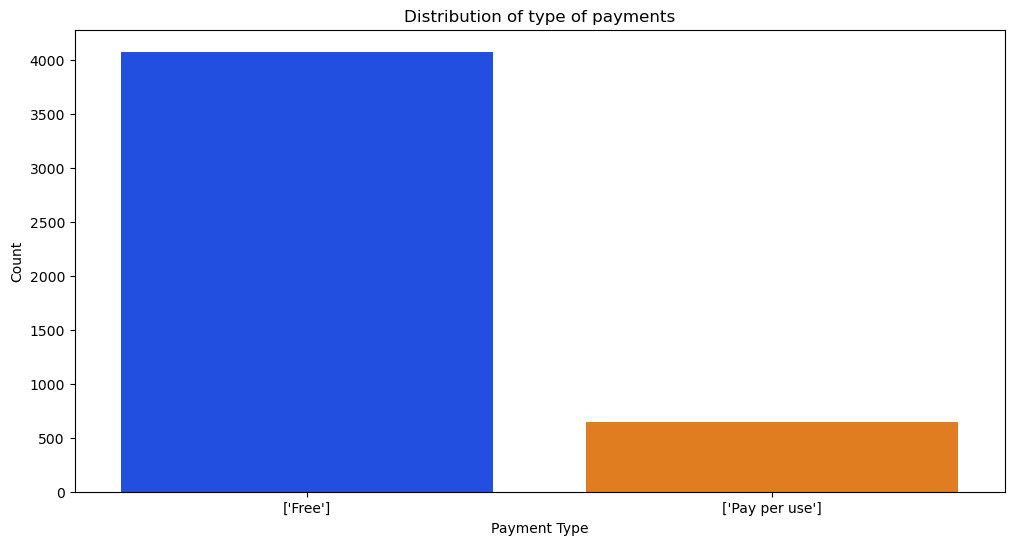

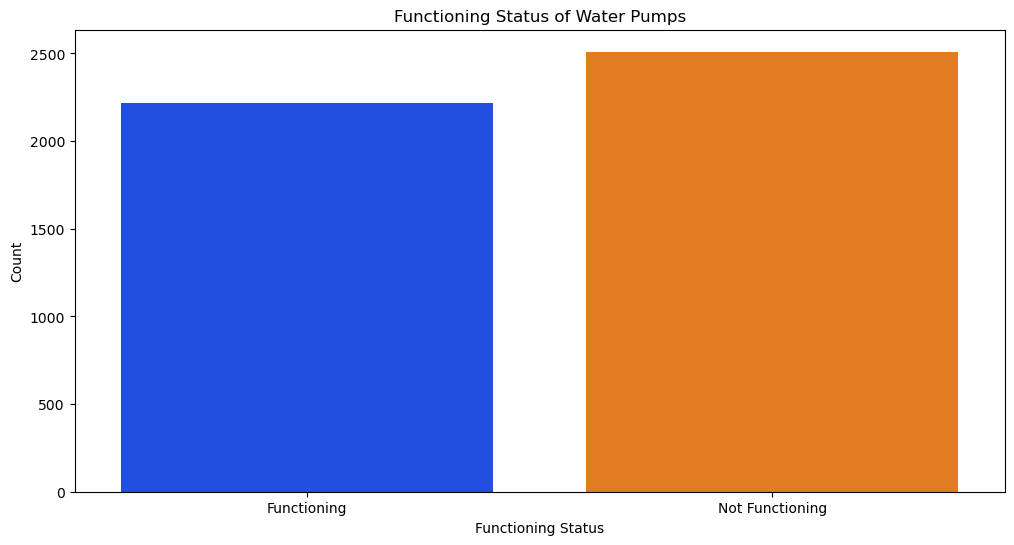

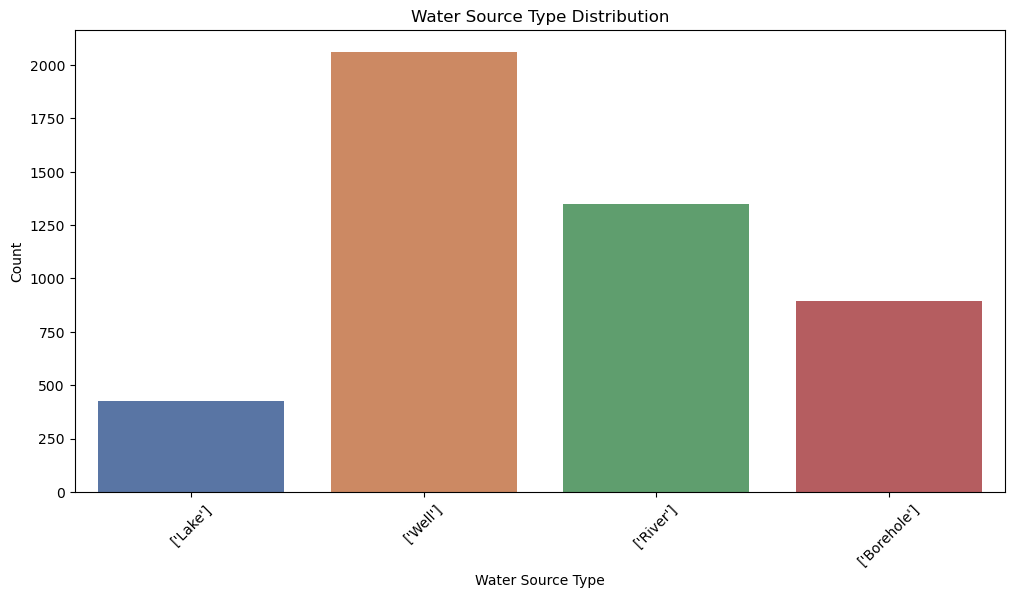

In [9]:

# Bar plot of funders
plt.figure(figsize=(12, 6))
top_funders = data['Funder'].value_counts().head(10)
sns.barplot(x=top_funders.index, y=top_funders.values, palette='muted')
plt.title('Top 5 Funders')
plt.xlabel('Funder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of water quality
plt.figure(figsize=(12, 6))
sns.countplot(x='Water Quality', data=data, palette='BuGn')
plt.title('Distribution of Water Quality')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.show()

# Count plot of Payment Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment Type', data=data, palette='bright')
plt.title('Distribution of type of payments')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

# Count plot of Functioning Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Functioning Status', data=data, palette='bright')
plt.title('Functioning Status of Water Pumps')
plt.xlabel('Functioning Status')
plt.ylabel('Count')
plt.show()

# Count plot of Water Source Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Water Source Type', data=data, palette='deep')
plt.title('Water Source Type Distribution')
plt.xlabel('Water Source Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Graphs for Numerical columns

C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


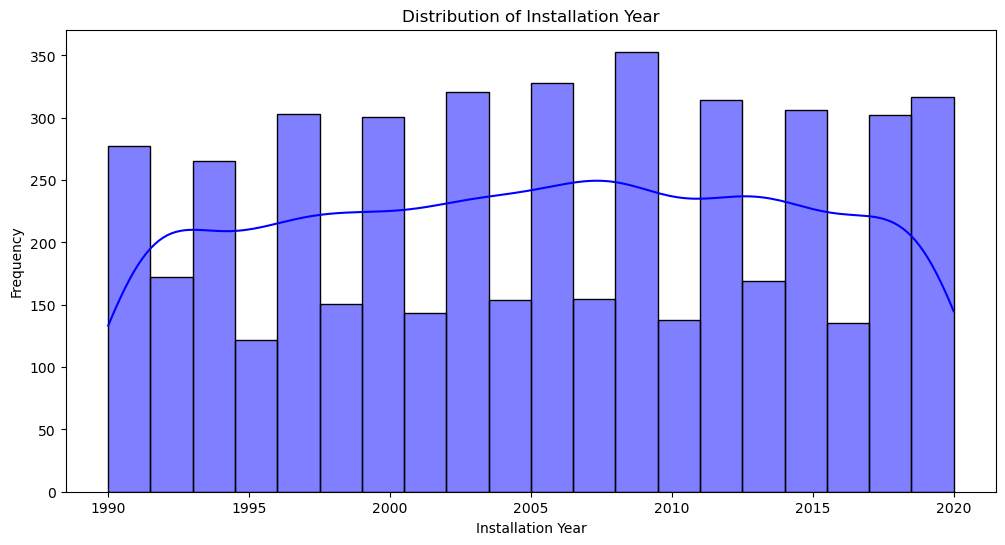

C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


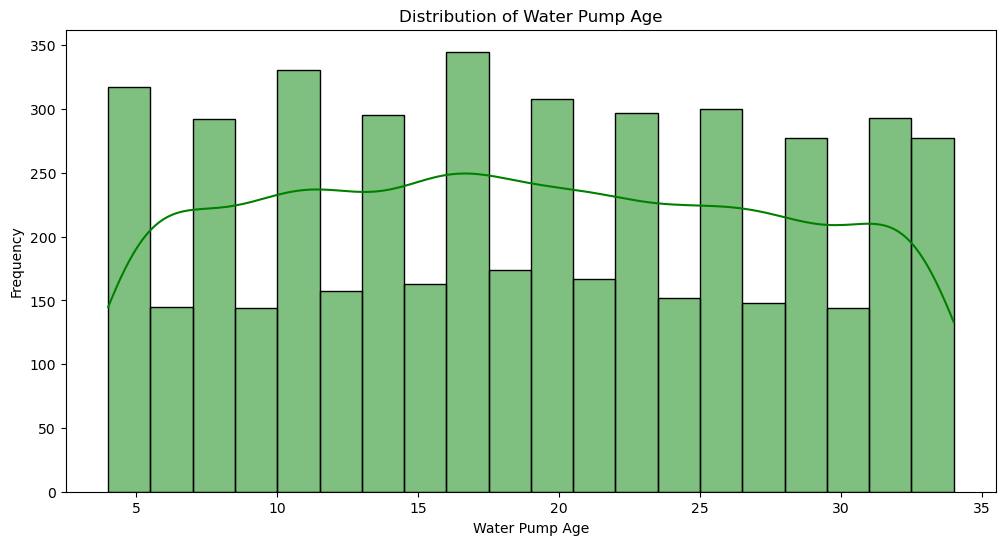

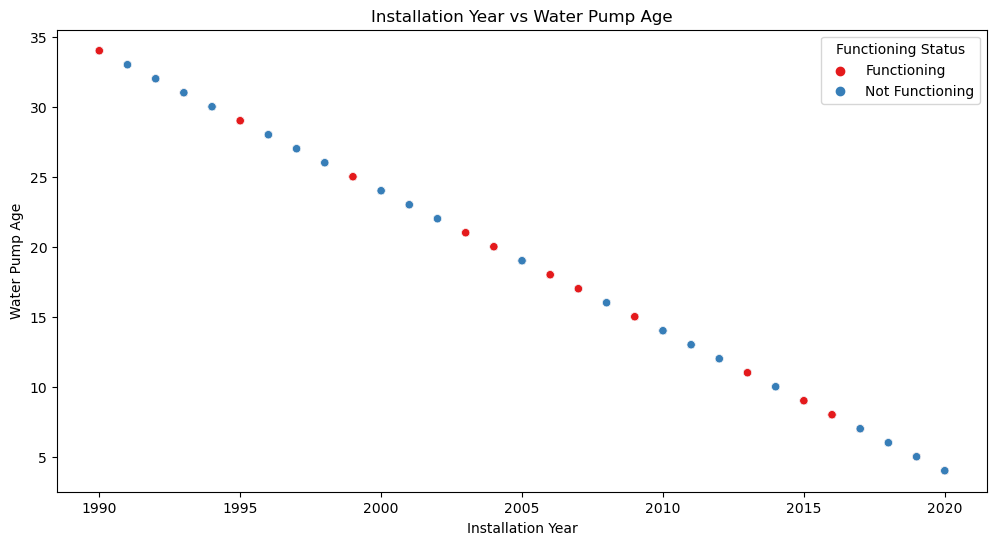

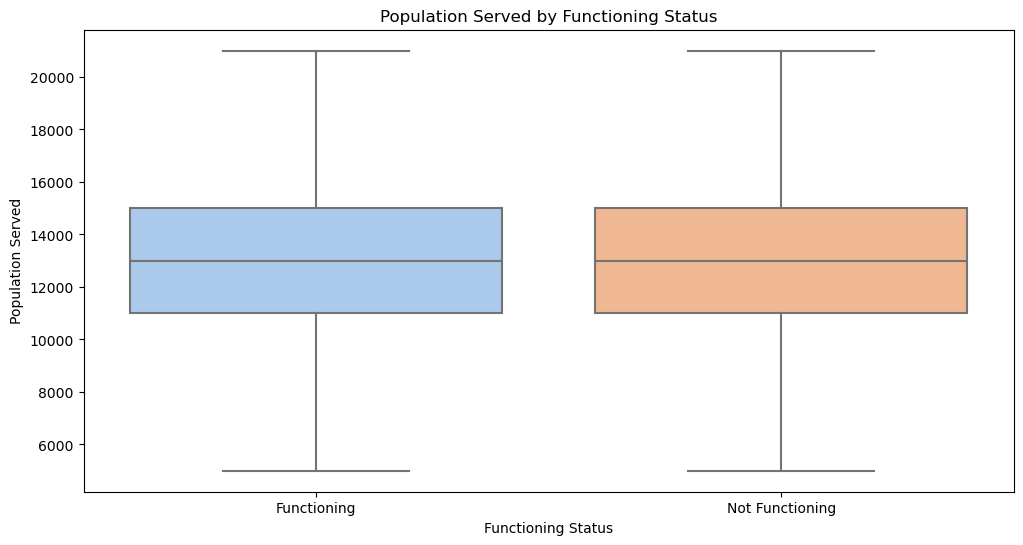

In [10]:
# Distribution of Installation Year
plt.figure(figsize=(12, 6))
sns.histplot(data['Installation Year'], bins=20, kde=True, color='blue')
plt.title('Distribution of Installation Year')
plt.xlabel('Installation Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of Water Pump Age
plt.figure(figsize=(12, 6))
sns.histplot(data['Water Pump Age'], bins=20, kde=True, color='green')
plt.title('Distribution of Water Pump Age')
plt.xlabel('Water Pump Age')
plt.ylabel('Frequency')
plt.show()

# Relationship between Installation Year and Water Pump Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Installation Year', y='Water Pump Age', hue='Functioning Status', data=data, palette='Set1')
plt.title('Installation Year vs Water Pump Age')
plt.xlabel('Installation Year')
plt.ylabel('Water Pump Age')
plt.show()

# Box plot of Population Served by Functioning Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Functioning Status', y='Population Served', data=data, palette='pastel')
plt.title('Population Served by Functioning Status')
plt.xlabel('Functioning Status')
plt.ylabel('Population Served')
plt.show()



Correlation between Numerical Columns

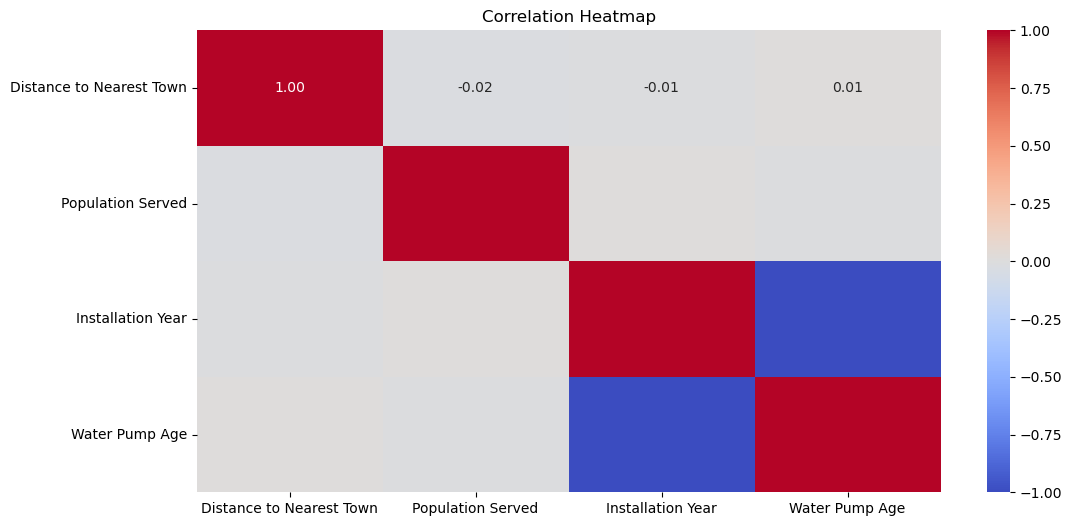

C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srinivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Figure size 1200x1200 with 0 Axes>

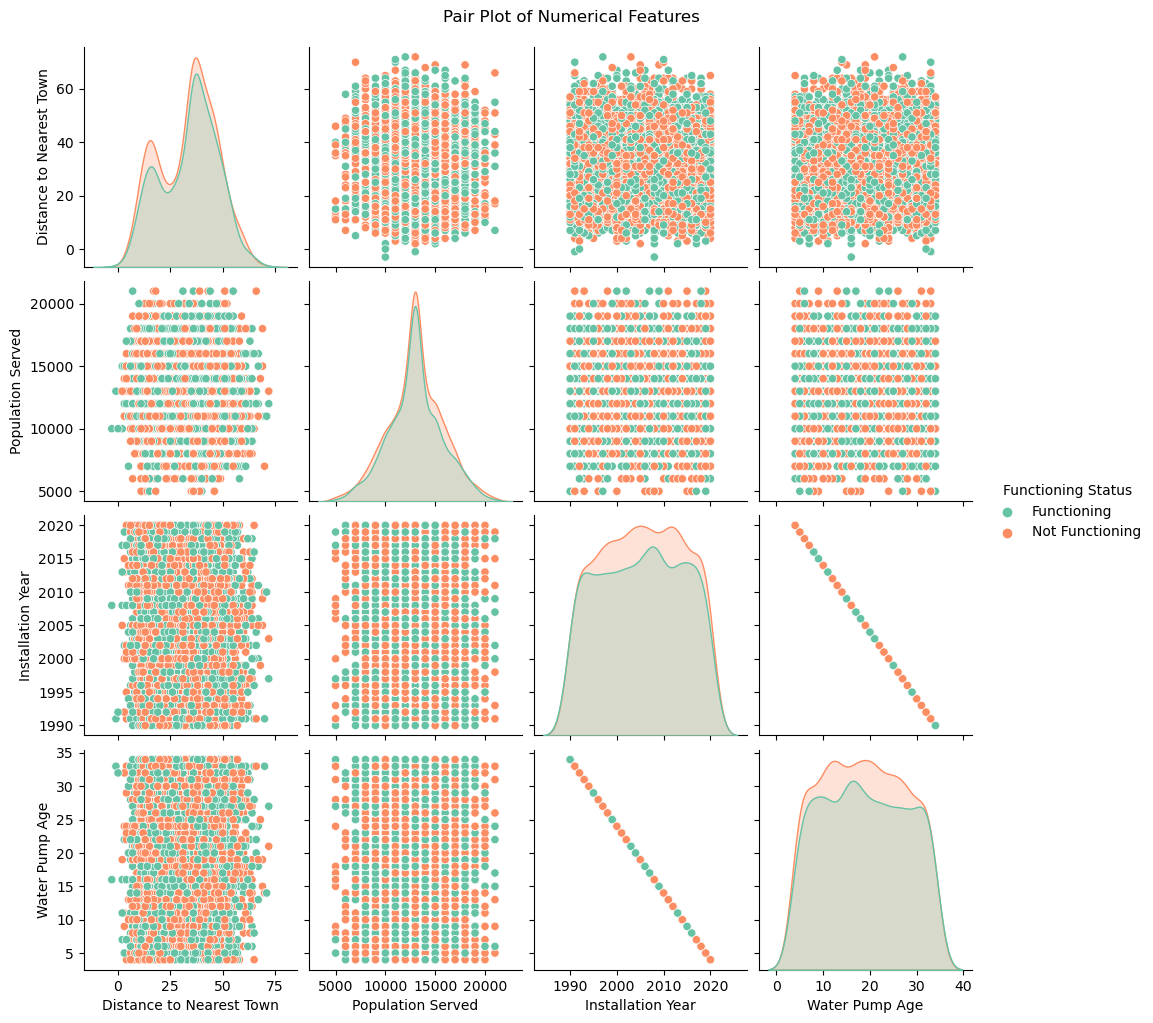

In [11]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(12, 6))
corr_matrix = data[['Distance to Nearest Town', 'Population Served', 'Installation Year', 'Water Pump Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot of numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(data[['Distance to Nearest Town', 'Population Served', 'Installation Year', 'Water Pump Age', 'Functioning Status']], hue='Functioning Status', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


## **Feature Engineering**

One hot encoding for Categorical columns and scaling the numerical columns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# One-hot encode the categorical columns
categorical_columns = ['Water Source Type', 'Water Quality', 'Funder', 'Payment Type', 'Pump Type']
data = pd.get_dummies(data, columns=categorical_columns)

# Label encode 'Water Pump ID'
label_encoder = LabelEncoder()
data['Water Pump ID'] = label_encoder.fit_transform(data['Water Pump ID'])

# Scale numerical features
numerical_cols = ['Distance to Nearest Town', 'Population Served', 'Installation Year', 'Water Pump Age']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Setting the feature and target columns

In [13]:
# Define the feature columns and target column
feature_columns = [col for col in data.columns if col not in ['Functioning Status', 'GPS Coordinates', 'Population Served']]
target_column = 'Functioning Status'

# Encode the target column (assuming binary classification: 'Functioning' and 'Not Functioning')
data[target_column] = data[target_column].apply(lambda x: 1 if x == 'Functioning' else 0)

# Split the data into features (X) and target (y)
X = data[feature_columns]
Y = data[target_column]

Splitting the dataset into train and test by 70/30 split

In [14]:
# Perform the 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Display the first few rows of the train and test datasets
print("Train Data:")
print(X_train.head())
print("\nTest Data:")
print(X_test.head())

Train Data:
      Water Pump ID  Distance to Nearest Town  Installation Year  \
1875            944                  0.601954           0.197526   
129             383                  0.964547           0.197526   
1620            702                  1.689734          -0.937162   
4769           3806                 -1.501087           1.105276   
4453           3501                  1.254622           0.084057   

      Water Pump Age  Water Source Type_['Borehole']  \
1875       -0.197526                           False   
129        -0.197526                           False   
1620        0.937162                           False   
4769       -1.105276                           False   
4453       -0.084057                           False   

      Water Source Type_['Lake']  Water Source Type_['River']  \
1875                       False                        False   
129                        False                        False   
1620                       False               

### **Prediction models**

Logistic Regression

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is included in the pipeline
    ('logistic', LogisticRegression(max_iter=10000))
])

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict using the logistic regression model
Y_pred_logistic_test = pipeline.predict(X_test)
Y_pred_logistic_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of being 'Functioning'

Displaying all performance metrics

In [16]:
# Training and testing accuracy
train_accuracy_logistic = pipeline.score(X_train, Y_train)
test_accuracy_logistic = pipeline.score(X_test, Y_test)

# Calculate testing metrics
precision_logistic = precision_score(Y_test, Y_pred_logistic_test, average='weighted')
recall_logistic = recall_score(Y_test, Y_pred_logistic_test, average='weighted')
f1_logistic = f1_score(Y_test, Y_pred_logistic_test, average='weighted')

# Print the metrics
print(f"\nLogistic Regression Training Accuracy: {train_accuracy_logistic:0.2f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_logistic:0.2f}")
print("Logistic Regression Precision:", precision_logistic)
print("Logistic Regression Recall:", recall_logistic)
print("Logistic Regression F1-Score:", f1_logistic)

# Confusion Matrix for Test Data
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic_test)
print("Confusion Matrix:")
print(conf_matrix_logistic)

# Classification Report for Test Data
class_report_logistic = classification_report(Y_test, Y_pred_logistic_test)
print("Classification Report:")
print(class_report_logistic)


Logistic Regression Training Accuracy: 0.54
Logistic Regression Test Accuracy: 0.54
Logistic Regression Precision: 0.5283205328672779
Logistic Regression Recall: 0.5401974612129761
Logistic Regression F1-Score: 0.50108006096232
Confusion Matrix:
[[609 156]
 [496 157]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       765
           1       0.50      0.24      0.33       653

    accuracy                           0.54      1418
   macro avg       0.53      0.52      0.49      1418
weighted avg       0.53      0.54      0.50      1418



Logistic Regression Confusion Matrix

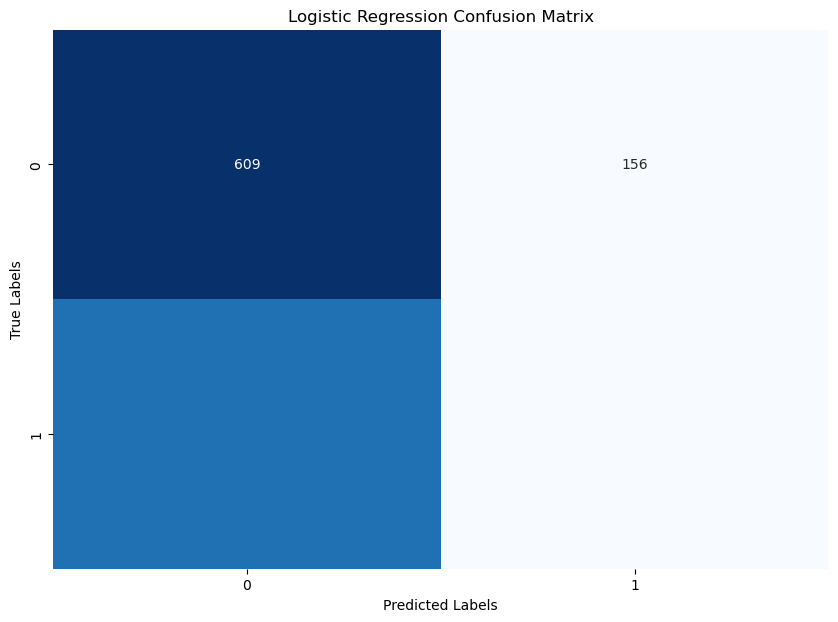

In [17]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ROC Curve

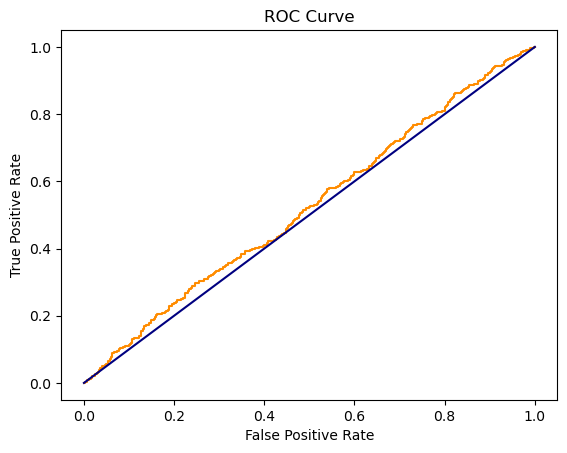

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_logistic_prob)
roc_auc = roc_auc_score(Y_test, Y_pred_logistic_prob)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Precision Recall Curve

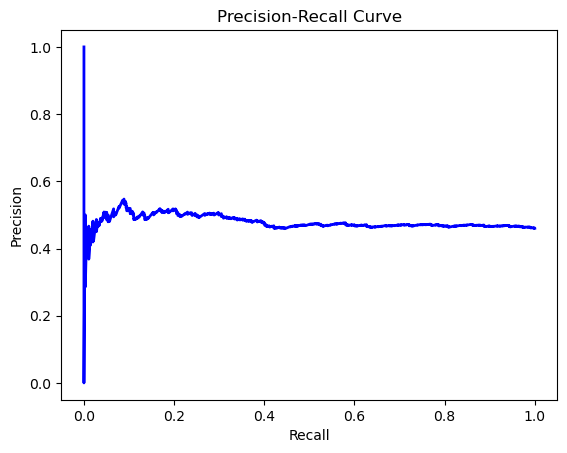

In [19]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_logistic_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest classifier
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train)
Y_pred_forest = forest_model.predict(X_test)
Y_pred_forest_prob = forest_model.predict_proba(X_test)[:, 1]

Displaying all performance metrics

In [21]:
# Training and testing accuracy
train_accuracy_forest = forest_model.score(X_train, Y_train)
test_accuracy_forest = forest_model.score(X_test, Y_test)

# Calculate metrics
precision_forest = precision_score(Y_test, Y_pred_forest, average='weighted')
recall_forest = recall_score(Y_test, Y_pred_forest, average='weighted')
f1_forest = f1_score(Y_test, Y_pred_forest, average='weighted')

# Print the metrics
print(f"\nRandom Forest Classifier Training Accuracy: {train_accuracy_forest:0.2f}")
print(f"Random Forest Classifier Test Accuracy: {test_accuracy_forest:0.2f}")
print("Random Forest Precision:", precision_forest)
print("Random Forest Recall:", recall_forest)
print("Random Forest F1-Score:", f1_forest)

# Confusion Matrix
conf_matrix_forest = confusion_matrix(Y_test, Y_pred_forest)
print("Confusion Matrix:")
print(conf_matrix_forest)

# Classification Report
class_report_forest = classification_report(Y_test, Y_pred_forest)
print("Classification Report:")
print(class_report_forest)


Random Forest Classifier Training Accuracy: 1.00
Random Forest Classifier Test Accuracy: 0.51
Random Forest Precision: 0.5060784246404388
Random Forest Recall: 0.5105782792665726
Random Forest F1-Score: 0.5066323221002286
Confusion Matrix:
[[459 306]
 [388 265]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       765
           1       0.46      0.41      0.43       653

    accuracy                           0.51      1418
   macro avg       0.50      0.50      0.50      1418
weighted avg       0.51      0.51      0.51      1418



Random Forest Confusion Matrix

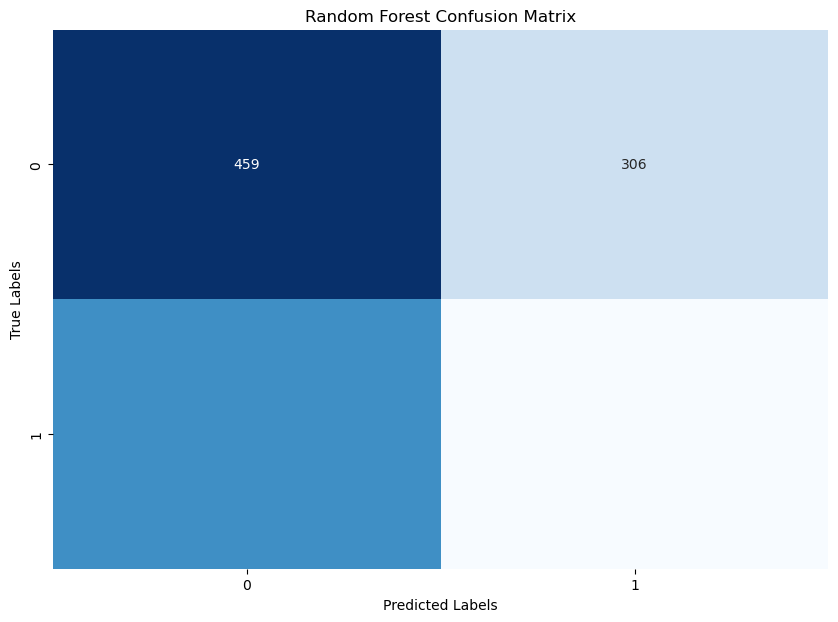

In [22]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ROC Curve

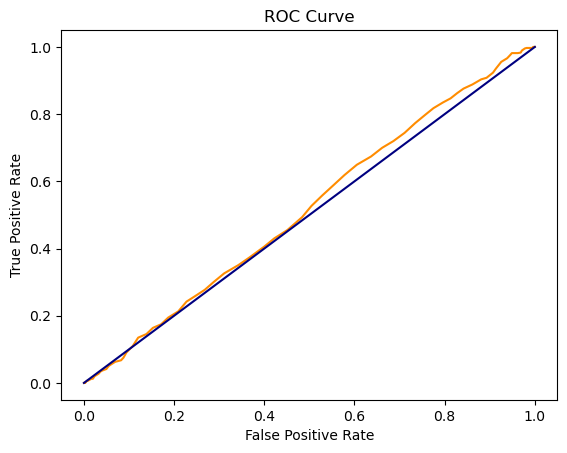

In [23]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_forest_prob)
roc_auc = roc_auc_score(Y_test, Y_pred_forest_prob)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Precision Recall Curve

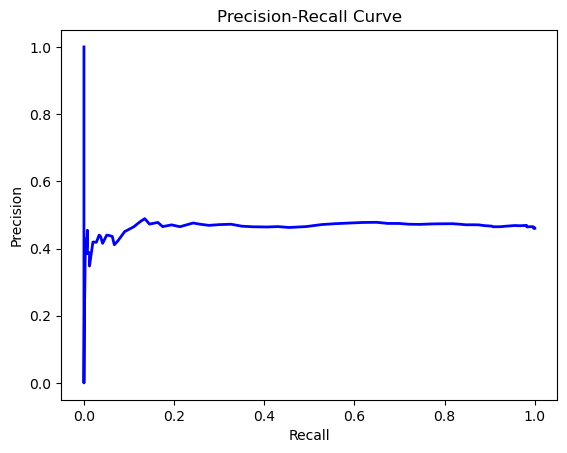

In [24]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_forest_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, Y_train)
Y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
Y_pred_gradient_boosting_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]

Displaying all performance metrics

In [26]:
# Training and testing accuracy
train_accuracy = gradient_boosting_model.score(X_train, Y_train)
test_accuracy = gradient_boosting_model.score(X_test, Y_test)

# Calculate metrics
precision_gradient_boosting = precision_score(Y_test, Y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(Y_test, Y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(Y_test, Y_pred_gradient_boosting, average='weighted')

# Print the metrics
print(f"\nGradient Boosting Classifier Training Accuracy: {train_accuracy:0.2f}")
print(f"Gradient Boosting Classifier Test Accuracy: {test_accuracy:0.2f}")
print("Gradient Boosting Classifier Precision:", precision_gradient_boosting)
print("Gradient Boosting Classifier Recall:", recall_gradient_boosting)
print("Gradient Boosting Classifier F1-Score:", f1_gradient_boosting)

# Confusion Matrix
conf_matrix_gradient_boosting = confusion_matrix(Y_test, Y_pred_gradient_boosting)
print("Confusion Matrix:")
print(conf_matrix_gradient_boosting)

# Classification Report
class_report_gradient_boosting = classification_report(Y_test, Y_pred_gradient_boosting)
print("Classification Report:")
print(class_report_gradient_boosting)


Gradient Boosting Classifier Training Accuracy: 0.66
Gradient Boosting Classifier Test Accuracy: 0.56
Gradient Boosting Classifier Precision: 0.5524128190710283
Gradient Boosting Classifier Recall: 0.5585331452750353
Gradient Boosting Classifier F1-Score: 0.5412972375806414
Confusion Matrix:
[[563 202]
 [424 229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       765
           1       0.53      0.35      0.42       653

    accuracy                           0.56      1418
   macro avg       0.55      0.54      0.53      1418
weighted avg       0.55      0.56      0.54      1418



Gradient Boosting Classifier Confusion Matrix

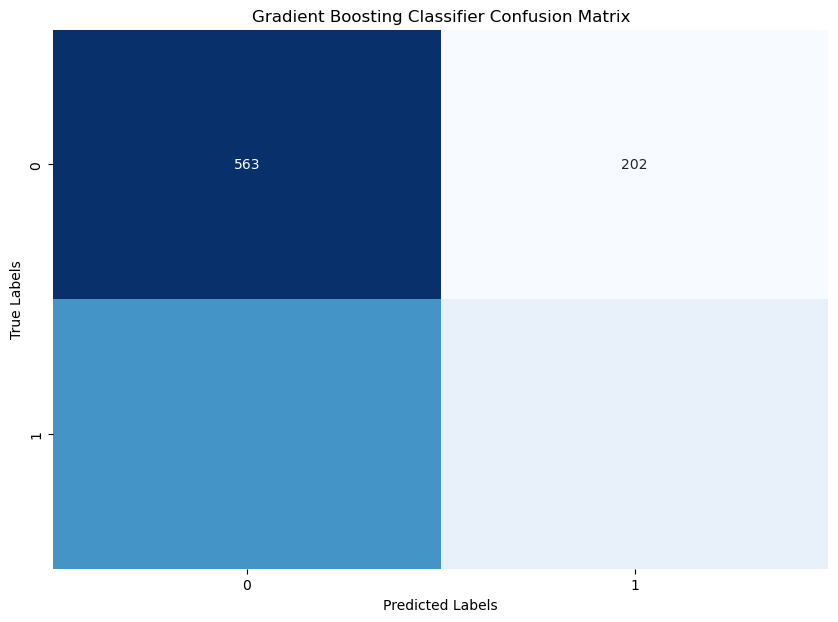

In [27]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gradient_boosting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ROC Curve

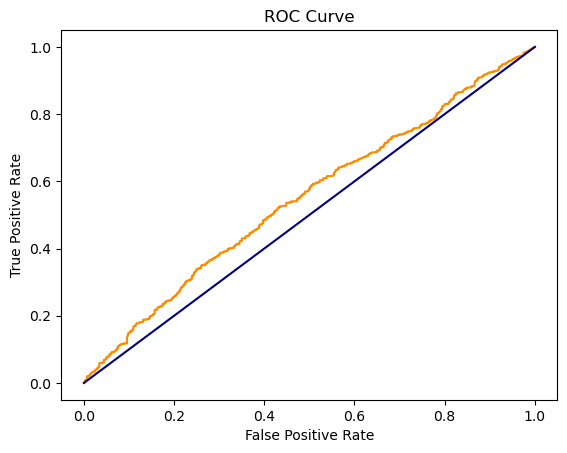

In [28]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_gradient_boosting_prob)
roc_auc = roc_auc_score(Y_test, Y_pred_gradient_boosting_prob)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Precision Recall Curve

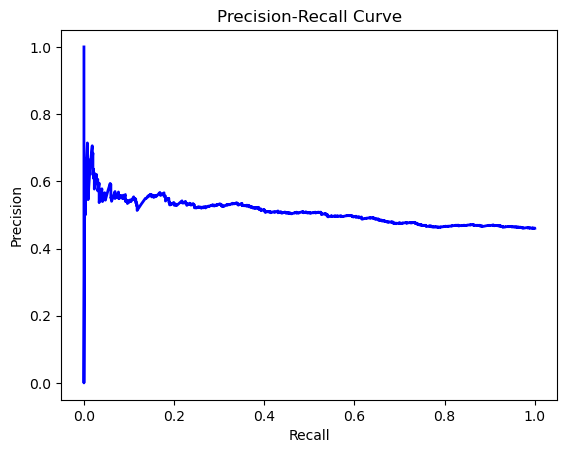

In [29]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_gradient_boosting_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()